<center><h1>Information Retrieval</h1></center>

# Setup

In [84]:
!gdown --id 1AVCr4QSsM-LAz6lNgIzTrmE7u7xyJ5VP

Downloading...
From: https://drive.google.com/uc?id=1AVCr4QSsM-LAz6lNgIzTrmE7u7xyJ5VP
To: /content/korpus_abstrak.csv
100% 761k/761k [00:00<00:00, 4.63MB/s]


In [85]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import nltk
import math
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
df_korpus = pd.read_csv('korpus_abstrak.csv')
df_korpus

,Link,Abstrak,Author,Pub,Ed
0,detail.jsp?id=46123&lokasi=lokal,Analisis Faktor yang Memengaruhi Loyalitas Kon...,Sumarliyanti,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Putu Wuri Handayani
1,detail.jsp?id=46126&lokasi=lokal,Analisis Perilaku Pengguna Dalam Mencapai Kred...,S. Reyneta Carissa Anwar,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Putu Wuri Handayani
2,detail.jsp?id=46149&lokasi=lokal,Desain Interaksi Aplikasi untuk Mengakomodasi ...,Mila Alief Alya,"Publisher: Depok"": Fakultas Ilmu Komputer Uni...",Harry Budi Santoso S
3,detail.jsp?id=46167&lokasi=lokal,Evaluasi dan Pengembangan Alternatif Desain In...,Ivana Putri,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso
4,detail.jsp?id=45008&lokasi=lokal,Evaluasi Desain Materi Instruksional Berdasark...,Aulia Chairunisa,"Publisher: Depok: Fakultas Ilmu Komputer UI, ...",Harri Budi Santoso
...,...,...,...,...,...
464,detail.jsp?id=46801&lokasi=lokal,Visualisasi Informasi dari Kemampuan Metakogni...,Resthu Rizfarchan Adisurya,Publisher: Depok: Fakultas Ilmu Komputer Univ...,Harry Budi Santoso
465,detail.jsp?id=4668&lokasi=lokal,Masalah transportasi merupakan suatu masalah y...,Hendrie Gunawan,"Publisher: Depok: Fasilkom UI, 2002 Call Numb...",Widijanto Nugroho
466,detail.jsp?id=4647&lokasi=lokal,Pergerakan benda di atas permukaan es dapat me...,Anita,"Publisher: Depok: Fasilkom UI, 2001 Call Numb...",Widijanto Nugroho
467,detail.jsp?id=4490&lokasi=lokal,"Dewasa ini, bentuk visual mendapat perhatian d...","Helmy A, Muhammad","Publisher: Depok: Fasilkom UI, 1996 Call Numb...",Eko Budiardjo


# Preprocessing

## Melakukan tokenisasi

In [87]:
abstrak = df_korpus['Abstrak']
low_abstrak = abstrak.str.lower()

In [88]:
token_abstrak = low_abstrak.apply(nltk.word_tokenize)
token_abstrak.head(10)

0    [analisis, faktor, yang, memengaruhi, loyalita...
1    [analisis, perilaku, pengguna, dalam, mencapai...
2    [desain, interaksi, aplikasi, untuk, mengakomo...
3    [evaluasi, dan, pengembangan, alternatif, desa...
4    [evaluasi, desain, materi, instruksional, berd...
5    [pengaruh, efek, moderasi, social, feature, da...
6    [rancangan, dan, implementasi, teknologi, intr...
7    [pentingnya, penerapan, teknologi, informasi, ...
8    [analisis, kegiatan, berbagi, pengetahuan, pad...
9    [adaptasi, expectation-confirmation, model, un...
Name: Abstrak, dtype: object

## Menghilangkan selain teks dari token

In [89]:
tmp = []
for i in token_abstrak:
    tmp.append([word for word in i if word.isalnum()])
token_wo_punc = pd.Series(tmp)
token_wo_punc.head(10)

0    [analisis, faktor, yang, memengaruhi, loyalita...
1    [analisis, perilaku, pengguna, dalam, mencapai...
2    [desain, interaksi, aplikasi, untuk, mengakomo...
3    [evaluasi, dan, pengembangan, alternatif, desa...
4    [evaluasi, desain, materi, instruksional, berd...
5    [pengaruh, efek, moderasi, social, feature, da...
6    [rancangan, dan, implementasi, teknologi, intr...
7    [pentingnya, penerapan, teknologi, informasi, ...
8    [analisis, kegiatan, berbagi, pengetahuan, pad...
9    [adaptasi, model, untuk, memprediksi, pengaruh...
dtype: object

# Algoritma BM-25 (Word Ranking)

## Perhitungan Term Frequency

In [90]:
tmp = []
for i in token_wo_punc:
  dictio = {}
  for j in i:
    if j not in dictio.keys():
      dictio[j] = 1
    else:
      dictio[j] = dictio[j] + 1
  tmp.append(dictio)
tf = pd.Series(tmp)
tf.head(10)

0    {'analisis': 2, 'faktor': 5, 'yang': 10, 'meme...
1    {'analisis': 1, 'perilaku': 1, 'pengguna': 3, ...
2    {'desain': 5, 'interaksi': 1, 'aplikasi': 5, '...
3    {'evaluasi': 3, 'dan': 4, 'pengembangan': 1, '...
4    {'evaluasi': 2, 'desain': 5, 'materi': 5, 'ins...
5    {'pengaruh': 3, 'efek': 2, 'moderasi': 2, 'soc...
6    {'rancangan': 1, 'dan': 8, 'implementasi': 1, ...
7    {'pentingnya': 1, 'penerapan': 3, 'teknologi':...
8    {'analisis': 1, 'kegiatan': 1, 'berbagi': 2, '...
9    {'adaptasi': 2, 'model': 3, 'untuk': 4, 'mempr...
dtype: object

## Perhitungan Inverse Document Frequency

In [91]:
tmp = []
for i in token_wo_punc:
  for j in i:
    if j in tmp:
      continue
    else:
      tmp.append(j)
vocabulary = pd.Series(tmp)
vocabulary.head(10)

0       analisis
1         faktor
2           yang
3    memengaruhi
4      loyalitas
5       konsumen
6          dalam
7        membeli
8        makanan
9           pada
dtype: object

In [92]:
tmp = {}
for i in vocabulary:
  df = 0
  for j in token_wo_punc:
    if i in j:
      df = df +1
  value_idf = math.log(1 + ((len(token_wo_punc) - df + 0.5)/(df + 0.5)))
  tmp[i] = value_idf
idf = pd.Series(tmp)
idf.head(10)

analisis       1.583190
faktor         1.883035
yang           0.007475
memengaruhi    2.427039
loyalitas      4.648655
konsumen       3.710386
dalam          0.221815
membeli        3.901441
makanan        4.137830
pada           0.185305
dtype: float64

## Perhitungan panjang document

In [93]:
tmp = {}
for i in range(len(abstrak)):
  tmp['doc ' + str(i+1)] = len(abstrak[i])
dl = pd.Series(tmp)
dl.head(10)

doc 1     1262
doc 2      914
doc 3     1130
doc 4     1159
doc 5     1123
doc 6      896
doc 7     1561
doc 8     1192
doc 9     1331
doc 10    2419
dtype: int64

In [94]:
total_length = 0
for i in dl:
  total_length = total_length + i
avg = total_length / len(dl)
avg

1455.7057569296376

## Perhitungan BM-25

In [95]:
def score(query, k, b):
  term = query.split()
  res = []
  for i in range(len(tf)):
    tmp = 0
    for j in term:
      if j not in idf or j not in tf[i]:
        continue
      else:
        idf_value = idf[j]
        tf_value = tf[i][j]
      pembilang =  tf_value * idf_value 
      penyebut = tf_value + (k*(1-b+(b*(dl['doc ' + str(i+1)]/avg))))
      tmp = tmp + (pembilang/penyebut)
    res.append(('Doc ' + str(i), token_wo_punc[i], tmp))
  final = pd.DataFrame(res, columns=['No Doc', 'Document', 'Score'])
  final.sort_values(by=['Score'], ascending=False,inplace=True)
  final.reset_index(inplace=True,drop=True)
  return final

## Pengetesan BM-25

query: information retrieval, k=1.2, b=0.75

In [96]:
score('information retrieval', 1.2, 0.75).head(10)

,No Doc,Document,Score
0,Doc 397,"[perolehan, informasi, lintas, bahasa, menggun...",4.641979
1,Doc 188,"[penelitian, ini, merancang, dan, mengimplemen...",3.208014
2,Doc 381,"[sistem, informasi, eksekutif, sebagai, salah,...",3.126866
3,Doc 50,"[kerja, praktik, analisis, yang, memengaruhi, ...",2.605500
4,Doc 36,"[analisis, faktor, pengaruh, jenis, interaksi,...",2.543279
5,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",2.350693
6,Doc 110,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...",2.223079
7,Doc 416,"[rancangan, penerapan, strategi, pembelajaran,...",2.050269
8,Doc 143,"[fitur, software, product, lines, menggunakan,...",2.031361
9,Doc 19,"[information, strategy, planning, atau, alat, ...",2.002853


query: sistem manajemen pengetahuan, k=1.2, b=0.5

In [97]:
score('sistem manajemen pengetahuan', 1.2, 0.5).head(10)

,No Doc,Document,Score
0,Doc 461,"[usability, evaluation, sistem, informasi, man...",3.627229
1,Doc 240,"[pembangunan, knowledge, base, melalui, pendek...",3.282343
2,Doc 453,"[kunci, kesuksesan, seubah, sistem, kontrol, s...",3.253277
3,Doc 264,"[penerapan, big, data, pada, data, rekam, medi...",3.181344
4,Doc 249,"[pemodelan, arsitektur, teknologi, sistem, inf...",3.107754
5,Doc 418,"[sistem, personalisasi, merupakan, salah, satu...",2.862771
6,Doc 15,"[dalam, membangun, suatu, aplikasi, sering, ka...",2.856179
7,Doc 399,"[perumusan, kamus, data, kompetensi, pegawai, ...",2.847093
8,Doc 8,"[analisis, kegiatan, berbagi, pengetahuan, pad...",2.508441
9,Doc 43,"[analisis, internal, dan, eksternal, yang, mem...",2.459574


query: knowledge discovery, k=2, b=0.5

In [98]:
score('knowledge discovery', 2, 0.5).head(10)

,No Doc,Document,Score
0,Doc 138,"[yang, mempengaruhi, kesuksesan, implementasi,...",2.942014
1,Doc 211,"[knowledge, graph, completeness, analytics, ca...",2.900847
2,Doc 417,"[rancangan, prediktor, akurasi, hasil, segment...",2.855496
3,Doc 43,"[analisis, internal, dan, eksternal, yang, mem...",2.606364
4,Doc 373,"[penjajaran, vocabulary, antara, data, tabular...",2.536924
5,Doc 240,"[pembangunan, knowledge, base, melalui, pendek...",2.304665
6,Doc 421,"[republikasi, data, pada, portal, data, terbuk...",1.788748
7,Doc 110,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...",1.376667
8,Doc 376,"[penyusunan, kerangka, untuk, mengevaluasi, da...",1.202033
9,Doc 158,"[remembrance, agent, ra, adalah, sebuah, agen,...",1.123755


# Neural Embedding Word2Vec

## Melakukan Stemming terhadap kata

In [99]:
!pip install PySastrawi

In [100]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [101]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [102]:
after_stem = []
for i in token_wo_punc:
  tmp = []
  for j in i:
    tmp.append(stemmer.stem(j))
  after_stem.append(tmp)

## Pembuatan model Word2Vec

In [103]:
!pip install gensim

In [104]:
from gensim.models import Word2Vec

In [105]:
model = Word2Vec(sentences = after_stem, size=2, window=5, min_count=1, workers=4, iter=10)

## Mencari peletakan koordinat dari kata

In [159]:
koor_algoritma = model['algoritma']
print(koor_algoritma)

[0.7761892 4.585204 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [107]:
koor_interface = model['interface']
print(koor_interface)

[0.83287126 2.4446106 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



## Ploting koordinat pada 2D Euclidean Space

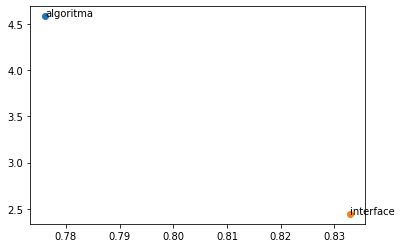

In [108]:
word_coor = {
    'algoritma' : koor_algoritma,
    'interface' : koor_interface
}

for i in word_coor.keys():
  coor = word_coor[i]
  x = coor[0]
  y = coor[1]
  plt.scatter(x, y)
  plt.annotate(i, xy=(x,y))

## Membuat fungsi untuk mengambil dokumen relevan

In [109]:
tmp = []
for i in after_stem:
  dictio = {}
  for j in i:
    if j not in dictio.keys():
      dictio[j] = model[j]
    else:
      continue
  tmp.append(dictio)
word_vec = pd.Series(tmp)
word_vec.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



0    {'analisis': [3.6213777, 3.2926002], 'faktor':...
1    {'analisis': [3.6213777, 3.2926002], 'perilaku...
2    {'desain': [-0.09343168, 4.298336], 'interaksi...
3    {'evaluasi': [3.2920506, 3.358033], 'dan': [1....
4    {'evaluasi': [3.2920506, 3.358033], 'desain': ...
5    {'pengaruh': [4.8836718, 4.0134773], 'efek': [...
6    {'rancang': [2.0489812, 3.4349082], 'dan': [1....
7    {'penting': [-0.012527441, 3.1622424], 'terap'...
8    {'analisis': [3.6213777, 3.2926002], 'giat': [...
9    {'adaptasi': [0.048068713, 0.6094034], 'model'...
dtype: object

In [110]:
tmp = {}
for i in range(len(word_vec)):
  tmp_value = np.array(list(word_vec[i].values()))
  value = tmp_value.mean(axis=0)
  tmp['doc '+str(i+1)] = value
doc_vec = pd.Series(tmp)
doc_vec.head(10)

doc 1       [1.5329089, 2.990952]
doc 2      [1.4311879, 2.9525495]
doc 3      [1.1869675, 3.3853383]
doc 4     [0.90012395, 3.0941038]
doc 5       [1.025788, 3.3841522]
doc 6       [1.677871, 3.0443902]
doc 7     [0.87897056, 2.7318866]
doc 8     [0.90464354, 3.1205492]
doc 9      [1.1696228, 2.6124353]
doc 10     [1.3389947, 3.0384831]
dtype: object

In [166]:
def score_word2vec(query):
  term = query.split()
  res = []
  for i in range(len(word_vec)):
    tmp = 0
    for j in term:
      if j not in word_vec[i]:
        continue
      else:
        word_vec_value = word_vec[i][j]
      pembilang =  np.dot(doc_vec['doc ' + str(i+1)], word_vec_value)
      penyebut = (norm(doc_vec['doc ' + str(i+1)])*norm(word_vec_value))
      tmp = tmp + (pembilang/penyebut)
    res.append(('Doc ' + str(i),after_stem[i], tmp))
  final = pd.DataFrame(res, columns=['No Doc', 'Document', 'Score'])
  final.sort_values(by=['Score'], ascending=False,inplace=True)
  final.reset_index(inplace=True,drop=True)
  return final

## Melakukan pengetasan fungsi

In [112]:
score_word2vec('information retrieval').head(10)

,No Doc,Document,Score
0,Doc 381,"[sistem, informasi, eksekutif, bagai, salah, s...",1.981903
1,Doc 188,"[teliti, ini, rancang, dan, implementasi, prot...",1.979499
2,Doc 397,"[oleh, informasi, lintas, bahasa, guna, korpus...",1.971094
3,Doc 39,"[analisis, faktor, yang, pengaruh, loyalitas, ...",0.999415
4,Doc 80,"[dampak, gamifikasi, dan, mobile, wallet, perf...",0.998600
5,Doc 103,"[teliti, ini, tuju, kembang, sistem, informasi...",0.998491
6,Doc 137,"[yang, pengaruh, ingin, untuk, beli, cara, imp...",0.997561
7,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",0.997420
8,Doc 50,"[kerja, praktik, analisis, yang, pengaruh, per...",0.996258
9,Doc 43,"[analisis, internal, dan, eksternal, yang, pen...",0.996137


In [113]:
score_word2vec('sistem manajemen pengetahuan').head(10)

,No Doc,Document,Score
0,Doc 453,"[kunci, sukses, ubah, sistem, kontrol, systems...",1.973350
1,Doc 399,"[rumus, kamus, data, kompetensi, pegawai, stud...",1.965530
2,Doc 264,"[terap, big, data, pada, data, rekam, medis, g...",1.959426
3,Doc 6,"[rancang, dan, implementasi, teknologi, intran...",1.951506
4,Doc 249,"[model, arsitektur, teknologi, sistem, informa...",1.944875
5,Doc 461,"[usability, evaluation, sistem, informasi, man...",1.941762
6,Doc 446,"[tugas, akhir, ini, implementasi, algoritma, g...",1.000000
7,Doc 434,"[untuk, laku, kenal, dengan, sistem, jaring, a...",0.999999
8,Doc 111,"[ekstraksi, hubung, pada, sistem, tanya, jawab...",0.999940
9,Doc 428,"[sistem, antarmuka, bahasa, alami, untuk, akse...",0.999882


In [114]:
score_word2vec('knowledge discovery').head(10)

,No Doc,Document,Score
0,Doc 373,"[jajar, vocabulary, antara, data, tabular, pad...",0.998876
1,Doc 110,"[ekstraksi, frase, kunci, pada, tanya, forum, ...",0.998614
2,Doc 417,"[rancang, prediktor, akurasi, hasil, segmentas...",0.998286
3,Doc 158,"[remembrance, agent, ra, adalah, buah, agen, y...",0.997871
4,Doc 211,"[knowledge, graph, completeness, analytics, ca...",0.996513
5,Doc 421,"[republikasi, data, pada, portal, data, buka, ...",0.995483
6,Doc 15,"[dalam, bangun, suatu, aplikasi, sering, kali,...",0.995116
7,Doc 376,"[susun, kerangka, untuk, evaluasi, dan, tingka...",0.992766
8,Doc 240,"[bangun, knowledge, base, lalu, dekat, ekstrak...",0.992450
9,Doc 138,"[yang, pengaruh, sukses, implementasi, knowled...",0.989497


## Penggunaan Pretrained data

In [155]:
!gdown --id 1yoAKPzIU0VZ52xdGrcgAtOlOtMKz90zE
!gdown --id 10XjGtwCc1hpF8lQaSREQo49Zn33LEkHu
!gdown --id 124S_Tros9vZ7Lo7jTB6ao1wqLd82KVz7

Downloading...
From: https://drive.google.com/uc?id=1yoAKPzIU0VZ52xdGrcgAtOlOtMKz90zE
To: /content/idwiki_word2vec_100.model
100% 25.6M/25.6M [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10XjGtwCc1hpF8lQaSREQo49Zn33LEkHu
To: /content/idwiki_word2vec_100.model.trainables.syn1neg.npy
100% 133M/133M [00:05<00:00, 24.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=124S_Tros9vZ7Lo7jTB6ao1wqLd82KVz7
To: /content/idwiki_word2vec_100.model.wv.vectors.npy
100% 133M/133M [00:05<00:00, 23.8MB/s]


In [153]:
import gensim

In [156]:
id_w2v = gensim.models.word2vec.Word2Vec.load('idwiki_word2vec_100.model')

### Pembuatan Fungsi (Pretrained Ver)

In [162]:
tmp = []
for i in after_stem:
  dictio = {}
  for j in i:
    if j not in dictio.keys():
      try:
        dictio[j] = id_w2v[j]
      except:
        dictio[j] = [0] * 100
    else:
      continue
  tmp.append(dictio)
word_vec_2 = pd.Series(tmp)
word_vec_2.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



0    {'analisis': [-1.3783318, 0.98533297, 3.634407...
1    {'analisis': [-1.3783318, 0.98533297, 3.634407...
2    {'desain': [-0.576871, 2.2023973, 1.9360865, 0...
3    {'evaluasi': [-1.2353892, -1.4117283, -0.14876...
4    {'evaluasi': [-1.2353892, -1.4117283, -0.14876...
5    {'pengaruh': [0.9296937, 1.090955, 2.2612352, ...
6    {'rancang': [0.08477639, 0.9150808, 0.24689874...
7    {'penting': [-2.4871202, 2.1695802, 0.75053024...
8    {'analisis': [-1.3783318, 0.98533297, 3.634407...
9    {'adaptasi': [-0.38519314, 2.8213072, 0.511988...
dtype: object

In [163]:
tmp = {}
for i in range(len(word_vec_2)):
  tmp_value = np.array(list(word_vec_2[i].values()))
  value = tmp_value.mean(axis=0)
  tmp['doc '+str(i+1)] = value
doc_vec_2 = pd.Series(tmp)
doc_vec_2.head(10)

doc 1     [-0.4326422824767489, 0.3224595205230591, 1.02...
doc 2     [-0.11702854004534805, 0.6581444494988559, 1.2...
doc 3     [-0.04014386, 0.867839, 1.1703557, -0.76829207...
doc 4     [0.2344684022796023, 0.9359975032736086, 1.414...
doc 5     [0.16386804, 1.1323181, 1.3494613, -0.6488402,...
doc 6     [-0.23282531369257858, 0.38656963871238437, 1....
doc 7     [0.0775848738822215, 0.43603060660340515, 1.01...
doc 8     [0.265612136242756, 1.2738375561358408, 1.2253...
doc 9     [-0.35312352357577764, -0.07674956088885665, 0...
doc 10    [0.057268667846727066, 0.8829490233901252, 0.9...
dtype: object

In [165]:
def score_word2vec_2(query):
  term = query.split()
  res = []
  for i in range(len(word_vec_2)):
    tmp = 0
    for j in term:
      if j not in word_vec_2[i]:
        continue
      else:
        word_vec_2_value = word_vec_2[i][j]
      pembilang =  np.dot(doc_vec_2['doc ' + str(i+1)], word_vec_2_value)
      penyebut = (norm(doc_vec_2['doc ' + str(i+1)])*norm(word_vec_2_value))
      tmp = tmp + (pembilang/penyebut)
    res.append(('Doc ' + str(i),after_stem[i], tmp))
  final = pd.DataFrame(res, columns=['No Doc', 'Document', 'Score'])
  final.sort_values(by=['Score'], ascending=False,inplace=True)
  final.reset_index(inplace=True,drop=True)
  return final

### Pengetesan Fungsi (Pretrained Ver)

In [168]:
score_word2vec_2('information retrieval').head(10)

,No Doc,Document,Score
0,Doc 175,"[tugas, akhir, ini, tuju, untuk, implementasi,...",0.257396
1,Doc 110,"[ekstraksi, frase, kunci, pada, tanya, forum, ...",0.254229
2,Doc 251,"[model, desain, aplikasi, software, product, l...",0.172206
3,Doc 188,"[teliti, ini, rancang, dan, implementasi, prot...",0.131296
4,Doc 103,"[teliti, ini, tuju, kembang, sistem, informasi...",0.118267
5,Doc 143,"[fitur, software, product, les, guna, delta, p...",0.116578
6,Doc 43,"[analisis, internal, dan, eksternal, yang, pen...",0.089195
7,Doc 381,"[sistem, informasi, eksekutif, bagai, salah, s...",0.050053
8,Doc 416,"[rancang, terap, strategi, ajar, progresif, pa...",0.044445
9,Doc 39,"[analisis, faktor, yang, pengaruh, loyalitas, ...",0.040363


In [170]:
score_word2vec_2('sistem manajemen pengetahuan').head(10)

,No Doc,Document,Score
0,Doc 399,"[rumus, kamus, data, kompetensi, pegawai, stud...",1.256500
1,Doc 249,"[model, arsitektur, teknologi, sistem, informa...",1.239992
2,Doc 6,"[rancang, dan, implementasi, teknologi, intran...",1.181942
3,Doc 461,"[usability, evaluation, sistem, informasi, man...",1.181126
4,Doc 264,"[terap, big, data, pada, data, rekam, medis, g...",1.148060
5,Doc 453,"[kunci, sukses, ubah, sistem, kontrol, systems...",1.140320
6,Doc 146,"[tuju, teliti, ini, adalah, buat, suatu, frame...",0.728591
7,Doc 141,"[faktor, integer, besar, dengan, algoritma, nu...",0.724866
8,Doc 214,"[lattice, dan, aplikasi, pada, sistem, kripto,...",0.719235
9,Doc 400,"[pinor, rupa, perangkat, lunak, yang, dapat, g...",0.710505


In [171]:
score_word2vec_2('knowledge discovery').head(10)

,No Doc,Document,Score
0,Doc 43,"[analisis, internal, dan, eksternal, yang, pen...",0.382445
1,Doc 110,"[ekstraksi, frase, kunci, pada, tanya, forum, ...",0.332891
2,Doc 138,"[yang, pengaruh, sukses, implementasi, knowled...",0.268281
3,Doc 376,"[susun, kerangka, untuk, evaluasi, dan, tingka...",0.264598
4,Doc 211,"[knowledge, graph, completeness, analytics, ca...",0.242070
5,Doc 15,"[dalam, bangun, suatu, aplikasi, sering, kali,...",0.233063
6,Doc 417,"[rancang, prediktor, akurasi, hasil, segmentas...",0.212206
7,Doc 240,"[bangun, knowledge, base, lalu, dekat, ekstrak...",0.200676
8,Doc 373,"[jajar, vocabulary, antara, data, tabular, pad...",0.179048
9,Doc 158,"[remembrance, agent, ra, adalah, buah, agen, y...",0.156038


Perbedaan dari menggunakan pretrained dan tanpa menggunakan pretrained adalah yang pertama menggunakan pretrained kita hanya tinggal lihat berapa nilai vektor dari kata yang mau kita cari sedangkan jika tidak kita perlu melakukan setting model dan juga melakukan train pada corpus yang kita punya. Kedua melanjutkan point satu yaitu kelebihan tanpa menggunakan pretrained adalah model yang digunakan tentunya akan lebih akurat dibandingkan pretrained karena data yang ada pada model berdasarkan corpus yang kita miliki sedangkan data pretrained menggunakan data corpus yang bukan kita miliki untuk train.

# Dimensionality Reduction

## Term Frequency dan Inverse Document Frequency

In [115]:
tf

0      {'analisis': 2, 'faktor': 5, 'yang': 10, 'meme...
1      {'analisis': 1, 'perilaku': 1, 'pengguna': 3, ...
2      {'desain': 5, 'interaksi': 1, 'aplikasi': 5, '...
3      {'evaluasi': 3, 'dan': 4, 'pengembangan': 1, '...
4      {'evaluasi': 2, 'desain': 5, 'materi': 5, 'ins...
                             ...                        
464    {'visualisasi': 3, 'informasi': 3, 'dari': 5, ...
465    {'masalah': 6, 'transportasi': 2, 'merupakan':...
466    {'pergerakan': 7, 'benda': 12, 'di': 3, 'atas'...
467    {'dewasa': 1, 'ini': 3, 'bentuk': 3, 'visual':...
468    {'telekonferensi': 2, 'digunakan': 2, 'sebagai...
Length: 469, dtype: object

In [116]:
idf

analisis        1.583190
faktor          1.883035
yang            0.007475
memengaruhi     2.427039
loyalitas       4.648655
                  ...   
interasksi      5.747268
adlah           5.747268
dimanipulasi    5.747268
cotrol          5.747268
conferencing    5.747268
Length: 7185, dtype: float64

In [117]:
vocabulary

0           analisis
1             faktor
2               yang
3        memengaruhi
4          loyalitas
            ...     
7180      interasksi
7181           adlah
7182    dimanipulasi
7183          cotrol
7184    conferencing
Length: 7185, dtype: object

In [118]:
tmp = []
for i in tf:
  tmp2 = []
  for j in vocabulary:
    if j not in idf or j not in i:
        tmp2.append(0)
    else:
        idf_value = idf[j]
        tf_value = i[j]
        tmp2.append(tf_value*idf_value)
  tmp.append(tmp2)
tfidf = pd.DataFrame(tmp, columns=vocabulary)
tfidf = tfidf.set_index(dl.keys())

In [119]:
tfidf

,analisis,faktor,yang,memengaruhi,loyalitas,konsumen,dalam,membeli,makanan,pada,layanan,online,studi,kasus,penelitian,ini,dilakukan,untuk,menganalisis,pembelian,di,indonesia,yaitu,digunakan,model,diajukan,berasal,dari,tiga,teori,kualitas,hubungan,perceived,value,perval,dan,mobile,service,quality,total,...,berkelompok,diadakanlah,diadaptasi,metakognisinya,visualisasinya,memprihatinkan,ruas,menghalangi,kontinum,menitik,beratkan,metematis,analitis,diffrence,fuite,kedapatan,diekekusi,permsamaan,padat,lengang,ba,es,tekanan,peristiwa,seara,orde,dibawahnya,mematikannya,fft,plot,surf,dimunculkan,bendi,rentang,amati,interasksi,adlah,dimanipulasi,cotrol,conferencing
doc 1,3.166379,9.415176,0.074747,12.135196,9.297311,7.420771,0.665444,3.901441,8.275659,0.370609,2.173051,3.579268,1.66973,1.739934,0.644635,0.033535,0.545094,0.035737,2.427039,3.411893,2.533095,1.119032,1.914004,0.678363,4.083249,3.478584,3.182318,0.232496,2.230759,4.670041,2.313280,2.735006,8.205018,24.350088,5.747268,0.073003,2.641187,2.995732,2.954060,3.132308,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc 2,1.583190,5.649106,0.022424,0.000000,0.000000,0.000000,0.221815,0.000000,0.000000,1.111828,0.000000,0.000000,0.00000,0.000000,0.966953,0.134139,0.000000,0.107212,2.427039,0.000000,0.000000,0.000000,0.957002,0.000000,0.000000,0.000000,3.182318,0.464991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073003,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc 3,1.583190,0.000000,0.014949,0.000000,0.000000,0.000000,0.443629,0.000000,0.000000,0.741219,0.000000,0.000000,1.66973,0.000000,0.644635,0.100604,0.000000,0.107212,0.000000,0.000000,1.899821,3.357096,0.000000,1.356727,0.000000,0.000000,0.000000,0.232496,0.000000,0.000000,4.626561,0.000000,0.000000,0.000000,0.000000,0.036501,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc 4,0.000000,0.000000,0.044848,0.000000,0.000000,0.000000,0.000000,0.000000,4.137830,0.000000,6.519153,1.789634,0.00000,0.000000,0.322318,0.033535,1.090188,0.107212,0.000000,0.000000,4.432916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.929983,2.230759,0.000000,4.626561,0.000000,0.000000,0.000000,0.000000,0.073003,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc 5,0.000000,0.000000,0.059797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370609,0.000000,0.000000,0.00000,0.000000,0.644635,0.100604,0.545094,0.214425,0.000000,0.000000,0.000000,0.000000,0.000000,0.678363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054752,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

## Proses dimension reduction PCA

In [120]:
from sklearn.decomposition import PCA
import plotly.express as px

In [121]:
pca = PCA(n_components=2)
components = pca.fit_transform(tfidf)

In [122]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Dimension Reduction TruncatedSVD

In [123]:
from sklearn.decomposition import TruncatedSVD

In [124]:
svd = TruncatedSVD(n_components=2)
components_svd = svd.fit_transform(tfidf)

In [125]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(svd.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components_svd,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()

## Perbedaan PCA dan SVD

Dari hasil PCA dan SVD yang didapatkan 2 visualisasi yang cukup berbeda. Untuk PCA component yang terbentuk cukup sama dikarenakan PCA akan menghilangkan element yang kurang memiliki impact dan menyimpan element atau component yang berimpact tinggi. Maka bentuk visualisasi dari PCA hampir mirip dikarenakan 2 visualisasi inilah yag menggambarkan component yang berdampak tinggi terhadap data.

Sedangkan untuk SVD memiliki perbedaan dikarenakan dalam perhitungan SVD tidak dilakukan proses memilih center dari component sehingga bentuknya cukup berbeda antara component 1 dan 2 nya. SVD sendiri juga cukup baik untuk mengelola data yang sparse seperti tf-idf data.

# IR Model Evaluation

In [126]:
bm25 = score('information retrieval', 1.2, 0.75).head(10)

In [127]:
word2vec = score_word2vec('information retrieval').head(10)

In [128]:
bm25

,No Doc,Document,Score
0,Doc 397,"[perolehan, informasi, lintas, bahasa, menggun...",4.641979
1,Doc 188,"[penelitian, ini, merancang, dan, mengimplemen...",3.208014
2,Doc 381,"[sistem, informasi, eksekutif, sebagai, salah,...",3.126866
3,Doc 50,"[kerja, praktik, analisis, yang, memengaruhi, ...",2.605500
4,Doc 36,"[analisis, faktor, pengaruh, jenis, interaksi,...",2.543279
5,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",2.350693
6,Doc 110,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...",2.223079
7,Doc 416,"[rancangan, penerapan, strategi, pembelajaran,...",2.050269
8,Doc 143,"[fitur, software, product, lines, menggunakan,...",2.031361
9,Doc 19,"[information, strategy, planning, atau, alat, ...",2.002853


In [129]:
word2vec

,No Doc,Document,Score
0,Doc 381,"[sistem, informasi, eksekutif, bagai, salah, s...",1.981903
1,Doc 188,"[teliti, ini, rancang, dan, implementasi, prot...",1.979499
2,Doc 397,"[oleh, informasi, lintas, bahasa, guna, korpus...",1.971094
3,Doc 39,"[analisis, faktor, yang, pengaruh, loyalitas, ...",0.999415
4,Doc 80,"[dampak, gamifikasi, dan, mobile, wallet, perf...",0.998600
5,Doc 103,"[teliti, ini, tuju, kembang, sistem, informasi...",0.998491
6,Doc 137,"[yang, pengaruh, ingin, untuk, beli, cara, imp...",0.997561
7,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",0.997420
8,Doc 50,"[kerja, praktik, analisis, yang, pengaruh, per...",0.996258
9,Doc 43,"[analisis, internal, dan, eksternal, yang, pen...",0.996137


## Human Judgement

List dokumen yang menurut saya relevan = 
[397, 188, 381, 110, 73, 43, 50]:

In [130]:
def label(df):
  lst_doc = [397, 188, 381, 110, 73, 43, 50]
  for i, row in df.iterrows():
    if int(row['No Doc'].split()[1]) in lst_doc:
      df.at[i,'Label'] = '1'
    else:
      df.at[i,'Label'] = '0'
  return df

BM25

In [131]:
label(bm25)

,No Doc,Document,Score,Label
0,Doc 397,"[perolehan, informasi, lintas, bahasa, menggun...",4.641979,1
1,Doc 188,"[penelitian, ini, merancang, dan, mengimplemen...",3.208014,1
2,Doc 381,"[sistem, informasi, eksekutif, sebagai, salah,...",3.126866,1
3,Doc 50,"[kerja, praktik, analisis, yang, memengaruhi, ...",2.605500,1
4,Doc 36,"[analisis, faktor, pengaruh, jenis, interaksi,...",2.543279,0
5,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",2.350693,0
6,Doc 110,"[ekstraksi, frase, kunci, pada, pertanyaan, fo...",2.223079,1
7,Doc 416,"[rancangan, penerapan, strategi, pembelajaran,...",2.050269,0
8,Doc 143,"[fitur, software, product, lines, menggunakan,...",2.031361,0
9,Doc 19,"[information, strategy, planning, atau, alat, ...",2.002853,0


Word2Vec

In [132]:
label(word2vec)

,No Doc,Document,Score,Label
0,Doc 381,"[sistem, informasi, eksekutif, bagai, salah, s...",1.981903,1
1,Doc 188,"[teliti, ini, rancang, dan, implementasi, prot...",1.979499,1
2,Doc 397,"[oleh, informasi, lintas, bahasa, guna, korpus...",1.971094,1
3,Doc 39,"[analisis, faktor, yang, pengaruh, loyalitas, ...",0.999415,0
4,Doc 80,"[dampak, gamifikasi, dan, mobile, wallet, perf...",0.998600,0
5,Doc 103,"[teliti, ini, tuju, kembang, sistem, informasi...",0.998491,0
6,Doc 137,"[yang, pengaruh, ingin, untuk, beli, cara, imp...",0.997561,0
7,Doc 131,"[kualitas, informasi, dan, kredibilitas, sumbe...",0.997420,0
8,Doc 50,"[kerja, praktik, analisis, yang, pengaruh, per...",0.996258,1
9,Doc 43,"[analisis, internal, dan, eksternal, yang, pen...",0.996137,1


## Precision@K, MAP Macro, MAP Micro

In [133]:
def precisionk(data,k):
  tmp = data.iloc[:k]
  relevance = tmp[tmp['Label'] == '1']
  value_presicion = len(relevance) / len(tmp['Label'])
  return value_presicion

In [134]:
def MAPMacro(lst_data):
  hasil = 0
  for data in lst_data:
    recall = 0
    lst_of_pres = []
    actual = len(data[data['Label'] == '1'])
    for i, row in data.iterrows():
      tmp = data.iloc[:i+1]
      recall = len(tmp[tmp['Label'] == '1'])/actual
      precision = len(tmp[tmp['Label'] == '1'])/len(tmp)
      if row['Label'] == '1':
        lst_of_pres.append(precision)
      if recall == 1:
        break
    hasil = hasil + (sum(lst_of_pres) / len(lst_of_pres))
  return (hasil / len(lst_data))

In [135]:
def MAPMicro(lst_data):
  hasil = 0
  lst_of_pres = []
  for data in lst_data:
    recall = 0
    actual = len(data[data['Label'] == '1'])
    for i, row in data.iterrows():
      tmp = data.iloc[:i+1]
      recall = len(tmp[tmp['Label'] == '1'])/actual
      precision = len(tmp[tmp['Label'] == '1'])/len(tmp)
      if row['Label'] == '1':
        lst_of_pres.append(precision)
      if recall == 1:
        break
  hasil = sum(lst_of_pres) / len(lst_of_pres)
  return hasil

BM25

In [136]:
precisionk(bm25,1)

1.0

In [137]:
precisionk(bm25,3)

1.0

In [138]:
precisionk(bm25,5)

0.8

Word2Vec

In [139]:
precisionk(word2vec,1)

1.0

In [140]:
precisionk(word2vec,3)

1.0

In [141]:
precisionk(word2vec,5)

0.6

MAP Macro

In [142]:
lst_data = [bm25,word2vec]
MAPMacro(lst_data)

0.8658730158730159

MAP Micro

In [143]:
lst_data = [bm25,word2vec]
MAPMicro(lst_data)

0.8658730158730158

## Recall Evaluation

In [144]:
def recallk(data,k,gt):
  tmp = data.iloc[:k]
  relevance = tmp[tmp['Label'] == '1']
  value_recall = len(relevance) / gt
  return value_recall

BM25

In [145]:
recallk(bm25,1,5)

0.2

In [146]:
recallk(bm25,3,5)

0.6

In [147]:
recallk(bm25,5,5)

0.8

Word2Vec

In [148]:
recallk(word2vec,1,5)

0.2

In [149]:
recallk(word2vec,3,5)

0.6

In [150]:
recallk(word2vec,5,5)

0.6

## Summary

Dilihat dari hasil precision@k dan recall@k dari BM25 dan Word2Vec memiliki kemiripan. Menurut hasil MAP micro maupun macro juga mendapatkan hasil yang cukup besar. Precision dari BM25 dan Word2Vec sudah cukup baik pada 3 element pertama dikarenakan element yang di retrieve oleh 2 query ini sudah memberikan document yang menurut saya releven terhadap query 'information retrieval'. Namun tentu saja untuk 10 document yang di retrieve tidak semuanya merupakan dokumen yang relevan.

Melihat perbandingan hasil precision@k dan recall@k, Hasil yang berbeda hanyalah pada precision@5 dan recall@5 dimana BM25 memiliki nilai yang lebih besar. Hal ini dikarenakan pada 5 elemen teratas BM25 memiliki document relevan yang di retrieve dibandingkan Word2Vec.

Secara keseluruhan nilai dari jumlah document relevan yang di retrieve Word2Vec terkadang lebih banyak dibandingkan BM25 dimana hal ini tergantung terhadap hasil dari model Word2Vec. Ini mempengaruhi hasil dari precision dan recall Word2Vec yang akan menghasilkan nilai yang berbeda sedangkan BM25 akan konstan karena nilai perhitungan sudah pasti.